In [1]:
from utils import discretize_space_uniform, discretize_space_non_uniform, moving_avg
import Models.Random as Random
import Models.Sarsa as Sarsa
import Models.Q_learning as Q_learning
import Models.Q_learning_ANN as Q_ann
import Models.DQN as DQN

import matplotlib.pyplot as plt
import numpy as np
import gym
env = gym.make("LunarLander-v2")

In [2]:
n_bins = (6, 4, 4, 4, 4, 4, 2, 2)

x_space = discretize_space_non_uniform(-3, -1, 1, 3, n_bins[0])
y_space = discretize_space_non_uniform(0, 1, 1.5, 2, n_bins[1])
vx_space = discretize_space_uniform(-2, 2, n_bins[2])
vy_space = discretize_space_uniform(-2, 0.5, n_bins[3])
theta_space = discretize_space_uniform(-3, 3, n_bins[4])
omega_space = discretize_space_uniform(-1, 1, n_bins[5])

discretization = [x_space, y_space, vx_space, vy_space, theta_space, omega_space]

alpha = 0.01
gamma = 0.99
episode_min_decay = 5000
episodes = 5000

In [3]:
# Random
env = gym.make("LunarLander-v2")
rew_random = Random.random(env, episodes)
mean_rew_random = moving_avg(rew_random, window=100)

In [4]:
# Sarsa
env = gym.make("LunarLander-v2")
rew_sarsa = Sarsa.sarsa(env, discretization, episode_min_decay, alpha, gamma, episodes)
mean_rew_sarsa = moving_avg(rew_sarsa, window=100)

# Q-learning
env = gym.make("LunarLander-v2")
rew_ql = Q_learning.q_learning(env, discretization, episode_min_decay, alpha, gamma, episodes)
mean_rew_ql = moving_avg(rew_ql, window=100)

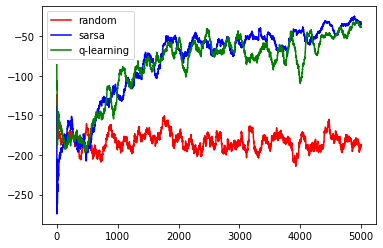

In [5]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_sarsa, color="blue", label="sarsa")
plt.plot(mean_rew_ql, color="green", label="q-learning")
plt.legend()
plt.show()

In [6]:
# Q-learning with value approximation
env = gym.make("LunarLander-v2")
rew_ql_ann = Q_ann.q_learning_ANN(env, 8, episodes)
mean_rew_dql = moving_avg(rew_ql_ann, window=100)

Episode 0	Average Reward: -160.41
Episode 100	Average Reward: -172.79
Episode 200	Average Reward: -135.93
Episode 300	Average Reward: -150.36
Episode 400	Average Reward: -160.16
Episode 500	Average Reward: -154.26
Episode 600	Average Reward: -142.67
Episode 700	Average Reward: -146.18
Episode 800	Average Reward: -137.59
Episode 900	Average Reward: -141.26
Episode 999	Average Reward: -142.33

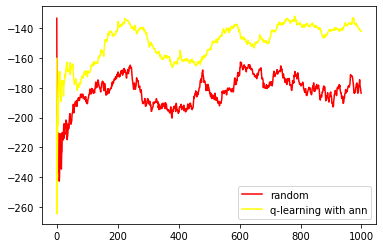

In [7]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_dql, color="yellow", label="q-learning with ann")
plt.legend()
plt.show()

In [8]:
# DQN
env = gym.make("LunarLander-v2")
rew_dqn = DQN.dqn(env, 8, episodes)
mean_rew_dqn = moving_avg(rew_dqn, window=100)

Episode 0	Average Reward: -99.30
Episode 100	Average Reward: -122.22
Episode 200	Average Reward: -49.307
Episode 300	Average Reward: -32.31
Episode 400	Average Reward: 28.649
Episode 500	Average Reward: 139.21
Episode 600	Average Reward: 191.23
Episode 620	Average Reward: 200.12
Environment solved in 520 episodes!	Average Score: 200.12
Episode 700	Average Reward: 226.09
Episode 800	Average Reward: 224.49
Episode 900	Average Reward: 231.71
Episode 999	Average Reward: 245.16

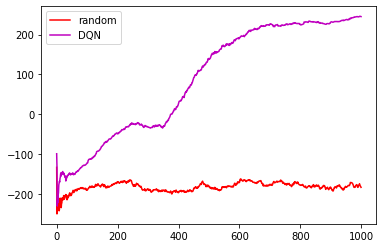

In [9]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_dqn, color="m", label="DQN")
plt.legend()
plt.show()

NameError: name 'mean_rew_dql' is not defined

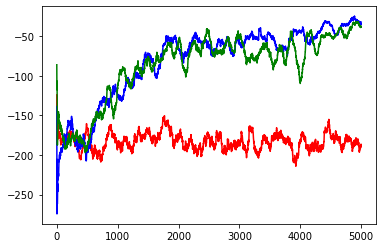

In [6]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_sarsa, color="blue", label="sarsa")
plt.plot(mean_rew_ql, color="green", label="q-learning")
plt.plot(mean_rew_dql, color="yellow", label="q-learning with ann")
plt.plot(mean_rew_dqn, color="m", label="DQN")
plt.legend()
plt.show()